<center>

# Home Assignment 2: DJA 🔭

## Deutsch-Jozsa Algorithm

### Enrico Pezzano 4825087

</center>

<br>

**Introduzione**  
Il DJA è la versione estesa dell'algoritmo di Deutsch, entrambi sono algoritmi quantistici che permettono di determinare se una funzione è costante o bilanciata.
Una funzione si definisce costante se restituisce sempre lo stesso valore (a prescindere dall'input) mentre è bilanciata se restituisce lo stesso numero di 0 e 1.
L'algoritmo di Deutsch semplice si limita a funzioni che restituiscono 0 o 1, quindi un bit soltanto, mentre il Deutsch-Joza è in grado di gestire funzioni che restituiscono un numero arbitrario di bit; in questo caso, come richiesto dall'home assignment, ho implementato l'algoritmo per funzioni che ricevono 2 bit e ne restituiscono uno solo.

<br>

**Pseudo codice:** 🧠  
Dato $n = 2$
- Passo 1. Inizializza i qubit a 0 creando un circuito quantistico di n qubit.
- Passo 2. Applica la porta di Hadamard ad ogni qubit.
- Passo 3. Applica il circuito oracolo.
- Passo 4. Ripeti il passo 2.
- Passo 5. Misura ogni qubit, aggiungendone i risultati ad una lista. Se la lista contiene tutti 0, allora la funzione è costante. Altrimenti, è una funzione bilanciata.

<br>

**Implementazione in Python:** 🐍  
Innanzitutto, installo le librerie necessarie:

In [281]:
! pip install matplotlib > /dev/null # redirect output to /dev/null to avoid installation messages
! pip install qiskit > /dev/null

Successivamente, le importo: 📚

In [282]:
from qiskit import QuantumCircuit, execute, IBMQ
from qiskit.visualization import plot_histogram
from qiskit.providers.jobstatus import JobStatus

<br>

### Alcune funzioni di definizione ≝
Ho implementato alcune funzioni per dimostrare come funzionano la porta CNOT ed una sua versione semplificata, una definizione pseudo formale ed un controllo (lapalissiano) per verificare che la funzione sia veramente bilanciata.  

<br>

**Funzione bilanciata** ⚖️  
In particolare, ritorna true se i due bit in input sono diversi, false altrimenti: lo stesso comportamento dello XOR.
Infatti se ricevo in input 00, ritorna 1, se ricevo 01 o 10 ritorna 0, se ricevo 11 ritorna 1...  
$$00 \to 1$$
$$01 \to 0$$
$$10 \to 0$$
$$11 \to 1$$

```py
if x == '00' or x == '11':
        return False
    else:
        return True
```
<br>
<br>
<br>
Invece il metodo CNOT vero e proprio è una porta logica che prende in input due qubit, il primo è di controllo, il secondo è il target: flippa il qubit target se e solo se il qubit di controllo è 1. Rappresentato tramite una matrice diventa:
<center>

|||||
|---|---|---|---|
| 1 | 0 | 0 | 0 |
| 0 | 1 | 0 | 0 |
| 0 | 0 | 0 | 1 |
| 0 | 0 | 1 | 0 |

</center>  

<br>
<br>

Di seguito la versione in Python: 🐍  

In [283]:
# same function as above, but refactored
def balanced_function(x):
    return x=='01' or x=='10'

<br>

**my_cnot** 🚫  
La funzione che definisce come funziona la porta CNOT su un circuito "quantum_circuit" (una formalità, siccome è già implementata in Qiskit):

In [284]:
# pseudo formal definition of the cnot gate
quantum_circuit = QuantumCircuit(2, 2)
def my_cnot(control, target):
    if control == 1:
        quantum_circuit.x(target) # negation, flip the bit

<br>

**È davvero bilanciata?** 🤔  
La funzione che controllo se la funzione è bilanciata o meno per davvero (come detto prima, è lapalissiano, la definizione è solo per completezza):

In [285]:
def is_balanced(f):
    countT = 0
    countF = 0
    for x in ['00', '01', '10', '11']:
        if f(x):
            countF += 1
        else:
            countT += 1
    return countT == countF

<br>

**E finalmente...** 🧑🏻‍💻  
...il codice che implementa l'algoritmo di Deutsch-Joza, seguendo lo pseudo codice riportato sopra. Prima di tutto, mi collego al backend di IBMQ per eseguire il circuito su un vero computer quantistico.  
Inizio creando un circuito quantistico di 2 qubit, inizializzandoli a 0 e applicando la porta di Hadamard ad entrambi.  
Aggiungo una barriera per separare i vari passaggi e disegnare ad ogni blocco di codice il circuito così come è stato eseguito fino a quel momento:

In [ ]:
# Load your IBM Quantum account
token = 'ccc1b9140df0575ac96fc17c4c938a7ca6259ff6a0b856ad1c8514c6c4802fb5643c2b1918f5e65a7440613d639ea2532d7d5ad073cfc9d3914d0336f98d3aa4'
IBMQ.save_account(token, overwrite=True)
IBMQ.load_account()

# Get the provider and choose a backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmq_qasm_simulator')

# Create a quantum circuit with two qubits and two classical bits
qc = QuantumCircuit(2, 2)

# Apply Hadamard gate to both qubits
qc.h(0)
qc.h(1)
qc.barrier()
qc.draw()

In [287]:
# Apply the balanced function as an oracle
qc.cx(1, 0) # same as my_cnot(1, 0) or cnot(1, 0) :)
qc.barrier()
qc.draw()

┌───┐ ░ ┌───┐ ░ 
q_0: ┤ H ├─░─┤ X ├─░─
     ├───┤ ░ └─┬─┘ ░ 
q_1: ┤ H ├─░───■───░─
     └───┘ ░       ░ 
c: 2/════════════════

In [288]:
# Apply Hadamard gate to the first qubit
qc.h(0)
qc.barrier()
qc.draw()

┌───┐ ░ ┌───┐ ░ ┌───┐ ░ 
q_0: ┤ H ├─░─┤ X ├─░─┤ H ├─░─
     ├───┤ ░ └─┬─┘ ░ └───┘ ░ 
q_1: ┤ H ├─░───■───░───────░─
     └───┘ ░       ░       ░ 
c: 2/════════════════════════

In [289]:
# Measure all the qubits
qc.measure_all()
qc.draw()

┌───┐ ░ ┌───┐ ░ ┌───┐ ░  ░ ┌─┐   
   q_0: ┤ H ├─░─┤ X ├─░─┤ H ├─░──░─┤M├───
        ├───┤ ░ └─┬─┘ ░ └───┘ ░  ░ └╥┘┌─┐
   q_1: ┤ H ├─░───■───░───────░──░──╫─┤M├
        └───┘ ░       ░       ░  ░  ║ └╥┘
   c: 2/════════════════════════════╬══╬═
                                    ║  ║ 
meas: 2/════════════════════════════╩══╩═
                                    0  1

<br>

**E i risultati?** 📊  
Tramite i metodi di Qiskit, ho eseguito il circuito 4000 volte (numero di default, si può eseguire un numero arbitrario di volte tramite il parametro "shots") e raccolto i dati tramite apposite variabili, in modo da avere un numero di risultati interessante su cui fare delle statistiche:

In [290]:
# Submit the job to the backend
job = execute(qc, backend)

# Get the job result
result = job.result()
counts = result.get_counts()

<br>

**Bilanciata o costante?** 🤔  
Come detto prima, se la funzione è constante, allora il risultato sarà sempre 0, altrimenti sarà 1 e di conseguenza la funzione sarà bilanciata.  
Eseguo anche un "controllo" con la mia funzione "è bilanciata?", evidendemente superfluo: 

In [291]:
if '0' in counts:
    print("The function is constant.")
else:
    print("The function is balanced.")
    print("Is it really?", is_balanced(balanced_function))

The function is balanced.
Is it really? True


<br>

**Visual proof** 👀  
Infine, per avere una prova visiva che del bilanciamento della funzione, ho disegnato il circuito con i risultati ottenuti:

{'00 00': 1993, '10 00': 2007}

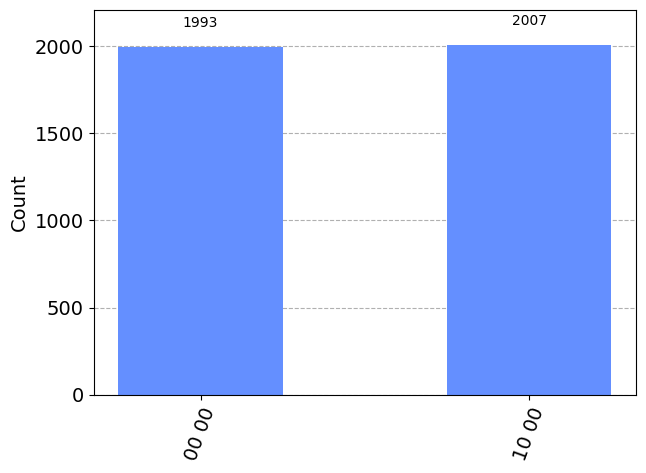

In [292]:
# if job.status() == JobStatus.DONE: # "debugging"
#     plot_histogram(counts)

display(counts)
plot_histogram(counts)

<br>

**L'oracolo** 🧙🏻‍♂️  
In questo laboratorio, l'oracolo (un circuito quantistico o una subroutine che fornisce informazioni su uno specifico problema o funzione che viene risolta: in questo caso, la porta CNOT) è stata applicata due volte, una per ogni qubit, ma il risultato è lo stesso, come aspettato: la funzione è bilanciata.  

# Conclusioni 📝
I risultati sono stati ottenuti da un computer quantistico vero e proprio, grazie ai metodi forniti da Qiskit ed al relativo account studenti IBM. Noto che i tempi di attesa sono stati molto brevi, nell'ordine di un minuto, e che i risultati sono stati ottenuti in modo molto preciso, con un margine di errore di circa 0.5% (senza margine avrei avuto una distribuzione di 2000 per colonna dell'istogramma). Invece, eseguendo il circuito su un simulatore, i tempi di attesa sono stati ancora più brevi, non più di un secondo, ma i risultati sono stati ottenuti in modo meno preciso, con un margine di errore di circa 5% (il codice sarebbe circa lo stesso, la differenza è che non c'è bisogno di collegarsi all'account IBMQ, ma si esegue tutto in locale, _hence why_ l'attesa pressochè inesistente). Aggiungo inoltre che provando altri home assignment direttamente sulla piattaforma cloud di IBMQ, i tempi di attesa sono stati molto più lunghi, circa 10 minuti (a volte nell'ordine delle ore).


Deutsch-Joza è l'algoritmo quantistico più semplice che ci sia (secondo solo alla sua prima versione, solo con Deutsch), ma è anche il più importante, in quanto è la base per tutti gli altri algoritmi quantistici. Grazie a lui sono evidenti i vantaggi della computazione quantistica rispetto a quella classica: 
- _parallelismo_: infatti, con un solo passaggio, siamo in grado di determinare se una funzione è bilanciata o costante, mentre in computazione classica, per lo stesso risultato, ci vorrebbe almeno un passaggio per ogni qubit;
- _interferenza_: la possibilità di interferenza tra i qubit permette di ottenere risultati che in computazione classica sarebbero impossibili da ottenere, come ad esempio la possibilità di ottenere un risultato bilanciato con una funzione che restituisce sempre 0 o sempre 1.


Nonostante la semplicità dell'algoritmo e la relativa mancanza di interesse applicativo vero e proprio, il vantaggio complessivo è esponenziale!  

# Bibliografia 📚
- [Qiskit](https://qiskit.org/)
- [IBM Quantum Experience](https://quantum-computing.ibm.com/)
- [Deutsch-Joza algorithm](https://en.wikipedia.org/wiki/Deutsch%E2%80%93Jozsa_algorithm)
- [Deutsch-Joza algorithm (IBM)](https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html)
- [Oracle machine](https://en.wikipedia.org/wiki/Oracle_machine)
- [Deutsch-Joza algorithm (IBM)](https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html)
- [QuantumCircuit](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html)
- [.draw()](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.draw.html)
- [.h()](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.h.html)
- [.measure()](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.measure.html)
- [.execute()](https://qiskit.org/documentation/stubs/qiskit.execute.html)
- [plot_histogram](https://qiskit.org/documentation/stubs/qiskit.visualization.plot_histogram.html)
- [IBMQ](https://www.ibm.com/docs/en/ibm-mq/9.1?topic=SSFKSJ_9.1.0/com.ibm.mq.helphome.v91.doc/WelcomePagev9r1.html)
- [IBMQBackend]( https://qiskit.org/documentation/stubs/qiskit.providers.ibmq.IBMQBackend.html)
- [IBMQ.status()]( https://qiskit.org/documentation/stubs/qiskit.providers.ibmq.IBMQBackend.status.html)